In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [9]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

In [15]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


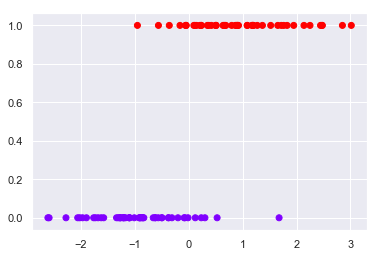

In [10]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [12]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [13]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.13844486]]
[0.07243764]


In [8]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [16]:
y_pred = lr.predict(x_test)

In [17]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[12,  1],
       [ 3,  9]])

In [11]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.0226498 , 0.9773502 ],
       [0.87407984, 0.12592016],
       [0.90645247, 0.09354753],
       [0.04993944, 0.95006056],
       [0.06361586, 0.93638414],
       [0.99489915, 0.00510085],
       [0.02696484, 0.97303516],
       [0.90024087, 0.09975913],
       [0.04107876, 0.95892124],
       [0.98721339, 0.01278661],
       [0.95517474, 0.04482526],
       [0.9779542 , 0.0220458 ],
       [0.26735811, 0.73264189],
       [0.95894786, 0.04105214],
       [0.928024  , 0.071976  ],
       [0.98839543, 0.01160457],
       [0.10305076, 0.89694924],
       [0.43807577, 0.56192423],
       [0.92245854, 0.07754146],
       [0.0322318 , 0.9677682 ],
       [0.94723769, 0.05276231],
       [0.97999949, 0.02000051],
       [0.02868163, 0.97131837],
       [0.00548912, 0.99451088],
       [0.15765196, 0.84234804]])

In [12]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

           x  y
19 -2.613960  0
15 -1.625736  0
4  -1.274331  0
17 -1.101563  0
18 -1.009753  0


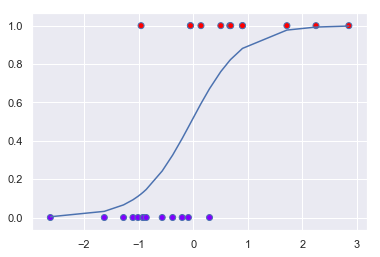

In [19]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
print(df.head())
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

![title]('pic.png')